### Edgar Moises Hernandez-Gonzalez
#### 26/02/20
#### Clasificacion de imagenes motoras en EEG con LSTM o GRU
##### Caracteristicas = RAW
##### 2 canales C3 y C4
##### 5 ejecuciones independientes

#### LSTM
##### Sujeto 1
##### Accuracy = 25%
##### Kappa = 0

#### GRU
##### Sujeto 1
##### Accuracy = 23.26%
##### Kappa = 0

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import cohen_kappa_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [0]:
c3_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/MI-EEG-A01T.csv", header=None).iloc[:, 7000:8000]
c4_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/MI-EEG-A01T.csv", header=None).iloc[:, 11000:12000]
c3_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/MI-EEG-A01E.csv", header=None).iloc[:, 7000:8000]
c4_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/MI-EEG-A01E.csv", header=None).iloc[:, 11000:12000]

In [0]:
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/EtiquetasA01E.csv", header=None)

In [0]:
x_train = np.concatenate((c3_train, c4_train), axis=1)
x_test = np.concatenate((c3_test, c4_test), axis=1)

In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 2000)
(288, 2000)
(288, 1)
(288, 1)


In [8]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [9]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los valores en un rango [-1, 1] porque se utiliza tanh
scaler = MinMaxScaler(feature_range=(-1, 1)).fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
#convertir de 2D a 3D
x_train = x_train.reshape((n_samples_train, 2, 1000))
x_test = x_test.reshape((n_samples_test, 2, 1000))

print(x_train.shape)
print(x_test.shape)

(288, 2, 1000)
(288, 2, 1000)


In [13]:
x_train = np.transpose(x_train, (0,2,1))
x_test = np.transpose(x_test, (0,2,1))

print(x_train.shape)
print(x_test.shape)

(288, 1000, 2)
(288, 1000, 2)


In [0]:
def RNN_LSTM():
  model = Sequential()
  model.add(LSTM(16, input_shape=x_train.shape[1:]))
  model.add(Dense(n_classes, activation='softmax'))
    
  optimizer = Adam(lr=1e-4)
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [0]:
def RNN_GRU():
  model = Sequential()
  model.add(GRU(16, input_shape=x_train.shape[1:]))
  model.add(Dense(n_classes, activation='softmax'))

  optimizer = Adam(lr=1e-4)
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

Iteration: 1
Train on 288 samples, validate on 288 samples
Epoch 1/40
288/288 - 26s - loss: 1.4031 - acc: 0.2118 - val_loss: 1.3788 - val_acc: 0.2674
Epoch 2/40
288/288 - 26s - loss: 1.4026 - acc: 0.2014 - val_loss: 1.3789 - val_acc: 0.2743
Epoch 3/40
288/288 - 25s - loss: 1.4022 - acc: 0.1979 - val_loss: 1.3790 - val_acc: 0.2743
Epoch 4/40
288/288 - 26s - loss: 1.4018 - acc: 0.1944 - val_loss: 1.3791 - val_acc: 0.2812
Epoch 5/40
288/288 - 25s - loss: 1.4015 - acc: 0.1979 - val_loss: 1.3792 - val_acc: 0.2743
Epoch 6/40
288/288 - 26s - loss: 1.4012 - acc: 0.2118 - val_loss: 1.3792 - val_acc: 0.2812
Epoch 7/40
288/288 - 25s - loss: 1.4008 - acc: 0.2118 - val_loss: 1.3793 - val_acc: 0.2812
Epoch 8/40
288/288 - 27s - loss: 1.4005 - acc: 0.2118 - val_loss: 1.3794 - val_acc: 0.2882
Epoch 9/40
288/288 - 27s - loss: 1.4001 - acc: 0.2118 - val_loss: 1.3795 - val_acc: 0.2847
Epoch 10/40
288/288 - 26s - loss: 1.3998 - acc: 0.2118 - val_loss: 1.3796 - val_acc: 0.2812
Epoch 11/40
288/288 - 26s - lo

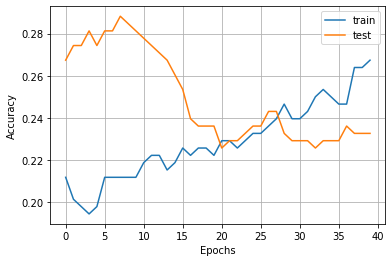

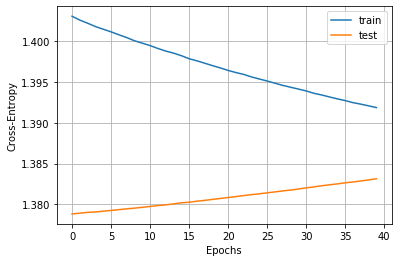


Resultados:
loss: [1.3831424580679998]
accuracy: [0.2326389]
kappa: [-0.02314814814814814]
f1: [0.22626385554734216]


In [22]:
array_loss = []
array_acc = []
array_kappa = []
array_f1 = []
for i in range(1):
    print("Iteration:", i+1);
    
    model = RNN_GRU()

    history = model.fit(x_train, y_train, epochs=40, batch_size=18,
                        validation_data=(x_test, y_test), verbose=2)
    
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    array_loss.append(test_loss)
    array_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    
    kappa = cohen_kappa_score(y_test, y_pred)
    array_kappa.append(kappa)
    print("kappa: ", kappa)

    f1 = f1_score(y_test, y_pred, average='macro')
    array_f1.append(f1)
    print("f1:", f1)
    
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_loss)
print("accuracy:", array_acc)
print("kappa:", array_kappa)
print("f1:", array_f1)

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 16)                912       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 68        
Total params: 980
Trainable params: 980
Non-trainable params: 0
_________________________________________________________________


In [24]:
print("Mean Accuracy: %.4f" % np.mean(array_acc))
print("Mean Kappa: %.4f" % np.mean(array_kappa))
print("Mean F1: %.4f" % np.mean(array_f1))
print("Max Accuracy: %.4f" % np.max(array_acc))
print("Max Kappa: %.4f" % np.max(array_kappa))
print("Max F1: %.4f" % np.max(array_f1))

Mean Accuracy: 0.2326
Mean Kappa: -0.0231
Mean F1: 0.2263
Max Accuracy: 0.2326
Max Kappa: -0.0231
Max F1: 0.2263
